In [22]:
import requests
from bs4 import BeautifulSoup

In [43]:
# Request sofascore.com URL then parse using bs4
response = requests.get(
    "https://www.sofascore.com/west-ham-united-brighton-and-hove-albion/FsM#11352466",
    headers={
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.54"
    },
)

soup = BeautifulSoup(response.text, "html.parser")
soup.select('g[cursor="pointer"]')

[]

In [45]:
# Copied converted CURL w/ headers from curlconverter.com
import requests

headers = {
    "authority": "api.sofascore.com",
    "accept": "*/*",
    "accept-language": "es,es-ES;q=0.9,en;q=0.8,en-GB;q=0.7,en-US;q=0.6",
    "cache-control": "max-age=0",
    "dnt": "1",
    "if-none-match": 'W/"a268a114d7"',
    "origin": "https://www.sofascore.com",
    "referer": "https://www.sofascore.com/",
    "sec-ch-ua": '"Chromium";v="116", "Not)A;Brand";v="24", "Microsoft Edge";v="116"',
    "sec-ch-ua-mobile": "?1",
    "sec-ch-ua-platform": '"Android"',
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-site",
    "user-agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Mobile Safari/537.36 Edg/116.0.1938.54",
}

response = requests.get(
    "https://api.sofascore.com/api/v1/event/11352466/shotmap", headers=headers
)

In [72]:
# Modify header then call API directly
headers["If-Modified-Since"] = "Sat, 26 Aug 2023 00:00:00 GMT"
response = requests.get(
    "https://api.sofascore.com/api/v1/event/11352466/shotmap", headers=headers
)

In [77]:
shots = response.json()

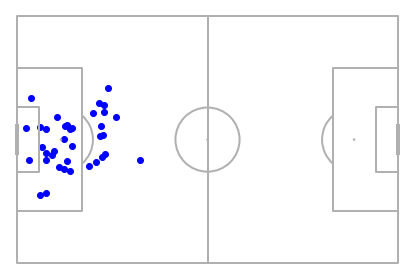

In [79]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt

pitch = Pitch(pitch_type="opta", figsize=(10, 7), line_zorder=2)
fig, ax = pitch.draw()

for entry in shots["shotmap"]:
    xcor = entry["playerCoordinates"]["x"]
    ycor = entry["playerCoordinates"]["y"]
    pitch.scatter(xcor, ycor, ax=ax, color="blue")

plt.show()